In [1]:
%reload_ext tensorboard
%tensorboard --logdir /scratch/itee/uqsswain/artifacts/spaa/autoencoders/gtsrb/lightning_logs --port=32768

/home/sweta/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2533


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 128, 3])


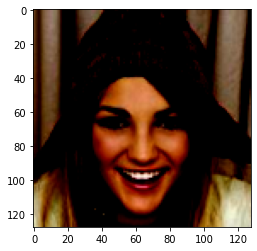

In [1]:
from dataloader import load_celeba
import matplotlib.pyplot as plt

train_dataloader, test_dataloader = load_celeba()
print(len(train_dataloader))
for x, y in train_dataloader:
    img = x[0].permute(1, 2, 0)
    print(img.shape)
    plt.imshow(img)
    break

In [ ]:
import torchvision
import torchsummary

model = torchvision.models.inception_v3(pretrained=True)
# model = model.to("cuda")
# torchsummary.summary(model, input_data=(3, 128, 128))
model

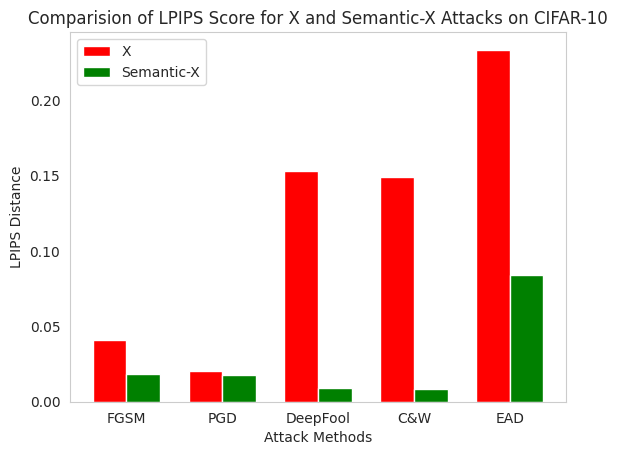

In [8]:
import matplotlib.pyplot as plt
import numpy as np



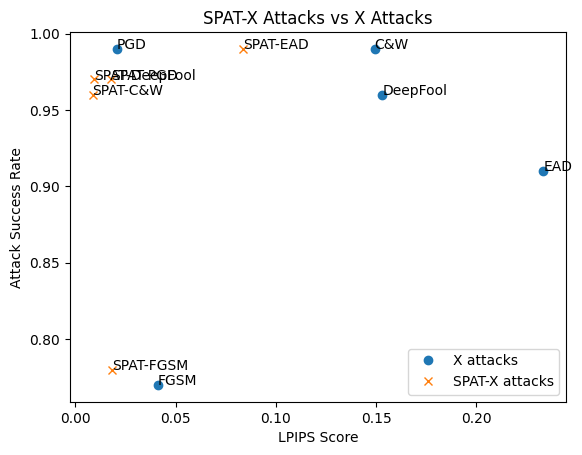

In [2]:
import matplotlib.pyplot as plt

x_attacks = ['FGSM', 'PGD', 'DeepFool', 'C&W', 'EAD']
s_x_attacks = ['SPAT-FGSM', 'SPAT-PGD', 'SPAT-DeepFool', 'SPAT-C&W', 'SPAT-EAD']

robust_acc = [0.23, 0.01, 0.04, 0.01, 0.09]
s_x_robust_acc = [0.22, 0.03, 0.03, 0.04, 0.01]

attack_success_rate = [1 - acc for acc in robust_acc]
s_x_attack_success_rate = [1 - acc for acc in s_x_robust_acc]

lpips_score = [0.0411, 0.0207, 0.1531, 0.1492, 0.2334]
s_x_lpips_score = [0.0183, 0.0176, 0.0092, 0.0086, 0.0837]

plt.plot(lpips_score, attack_success_rate, 'o', label='X attacks')
plt.plot(s_x_lpips_score, s_x_attack_success_rate, 'x', label='SPAT-X attacks')

for i, attack in enumerate(x_attacks):
    plt.annotate(attack, (lpips_score[i], attack_success_rate[i]))

for i, attack in enumerate(s_x_attacks):
    plt.annotate(attack, (s_x_lpips_score[i], s_x_attack_success_rate[i]))

plt.xlabel('LPIPS Score')
plt.ylabel('Attack Success Rate')
plt.legend()
plt.title('SPAT-X Attacks vs X Attacks')
plt.show()

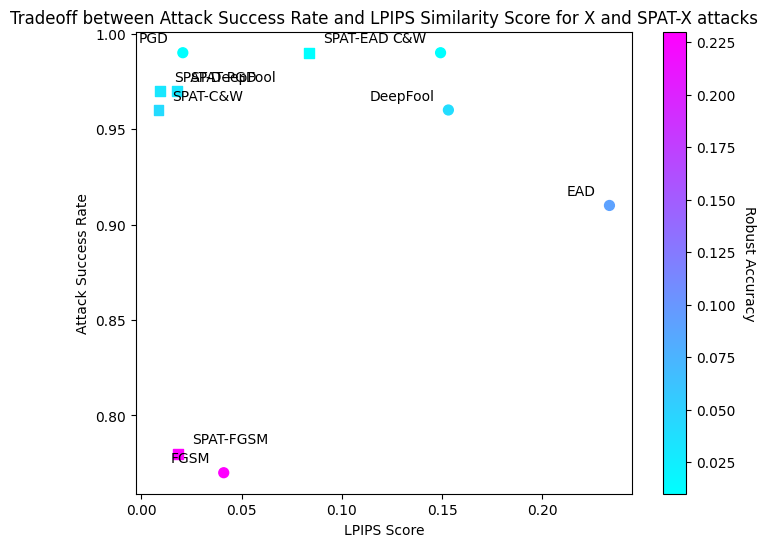

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x_attacks = ['FGSM', 'PGD', 'DeepFool', 'C&W', 'EAD']
s_x_attacks = ['SPAT-FGSM', 'SPAT-PGD', 'SPAT-DeepFool', 'SPAT-C&W', 'SPAT-EAD']

robust_acc = np.array([0.23, 0.01, 0.04, 0.01, 0.09])
s_x_robust_acc = np.array([0.22, 0.03, 0.03, 0.04, 0.01])

attack_success_rate = np.array([1 - acc for acc in robust_acc])
s_x_attack_success_rate = np.array([1 - acc for acc in s_x_robust_acc])

lpips_score = np.array([0.0411, 0.0207, 0.1531, 0.1492, 0.2334])
s_x_lpips_score = np.array([0.0183, 0.0176, 0.0092, 0.0086, 0.0837])

# Set up the figure
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Plot X attacks
sc = ax.scatter(lpips_score, attack_success_rate, s=50, c=robust_acc, cmap='cool', label='X attacks')

# Plot SPAT-X attacks
ax.scatter(s_x_lpips_score, s_x_attack_success_rate, s=50, c=s_x_robust_acc, cmap='cool', marker='s', label='SPAT-X attacks')

# Add colorbar
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Robust Accuracy', rotation=270, labelpad=15)

# Set axis labels
ax.set_xlabel('LPIPS Score')
ax.set_ylabel('Attack Success Rate')

# Add annotations for each attack
for i, attack in enumerate(x_attacks):
    ax.annotate(attack, (lpips_score[i], attack_success_rate[i]), xytext=(-10, 5), textcoords='offset points', ha='right', va='bottom')
for i, attack in enumerate(s_x_attacks):
    ax.annotate(attack, (s_x_lpips_score[i], s_x_attack_success_rate[i]), xytext=(10, 5), textcoords='offset points', ha='left', va='bottom')

# Add title
ax.set_title('Tradeoff between Attack Success Rate and LPIPS Similarity Score for X and SPAT-X attacks')

# Show the plot
plt.show()
